# Preamble



In [1]:
# Squeeze Lab Analysis
# Author: Add your name here as well
# Add a statement about what this notebook is analysing
# Details of the dates of the experiment - replace this with your own title
# Lab supervised by .....
# Link to folder with runnable notebook or colab
# https://colab.research.google.com/drive/15YXdwyyiNlRmijFWOQck0sxxPHxRm0tY?usp=sharing

# Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Lab Data

The following cells are where you will populate the data that you take in the lab. Analysis can be done at home. Discussion in groups is
allowed as well.

## Laser power stability

Import the data from your power meter here so we can see the data

In [3]:
power_data = '5min.csv' #replace the file name with the name of your data file

min_w, max_w, pct, count = np.loadtxt(power_data, delimiter=',', skiprows = 17,max_rows = 10, unpack=True)

min_w = min_w *1000
max_w = max_w *1000

mean_power = np.loadtxt(power_data, delimiter=',', skiprows = 31,usecols = 1, max_rows = 1, unpack=True)*1000 #mW

std_dev = np.loadtxt(power_data, delimiter=',', skiprows = 32, usecols = 1, max_rows = 1, unpack=True)*1000 #mW

relative_std = (std_dev/mean_power)*100
relative_std = relative_std.round(3)

power_values = (min_w + max_w) / 2
bin_width = (max_w - min_w)


for i in range (10):
  print('[',min_w[i].round(1),'-', max_w[i].round(1),'] mW', ': contribution =', pct[i],'% , counts =' ,count[i], '\n')


[ 612.1 - 613.4 ] mW : contribution = 6.9 % , counts = 4004.0 

[ 613.4 - 614.7 ] mW : contribution = 15.0 % , counts = 8734.0 

[ 614.7 - 616.0 ] mW : contribution = 14.1 % , counts = 8222.0 

[ 616.0 - 617.3 ] mW : contribution = 6.6 % , counts = 3862.0 

[ 617.3 - 618.7 ] mW : contribution = 7.9 % , counts = 4610.0 

[ 618.7 - 620.0 ] mW : contribution = 8.7 % , counts = 5056.0 

[ 620.0 - 621.3 ] mW : contribution = 10.2 % , counts = 5944.0 

[ 621.3 - 622.6 ] mW : contribution = 11.5 % , counts = 6703.0 

[ 622.6 - 623.9 ] mW : contribution = 15.3 % , counts = 8900.0 

[ 623.9 - 625.3 ] mW : contribution = 3.9 % , counts = 2282.0 



## SHG data

In [4]:
# SHG Output Power vs Temperature

shg_data = 'T_power_stddev.csv'
T, Pmean, std = np.loadtxt(shg_data, delimiter=',', skiprows = 1,unpack=True)


## Zero span data

In [5]:
# Relative amplitude spectral density vs Measurement time

# Data from all 6 traces

t1, V1 = np.loadtxt('Trace_1.csv',delimiter=',', skiprows = 4,unpack=True) # Dark noise
t2, V2 = np.loadtxt('Trace_2.csv',delimiter=',', skiprows = 4,unpack=True) # Shot noise
t3, V3 = np.loadtxt('Trace_3.csv',delimiter=',', skiprows = 4,unpack=True)
t4, V4 = np.loadtxt('Trace_4.csv',delimiter=',', skiprows = 4,unpack=True)
t5, V5 = np.loadtxt('Trace_5.csv',delimiter=',', skiprows = 4,unpack=True)
t6, V6 = np.loadtxt('Trace_6.csv',delimiter=',', skiprows = 4,unpack=True)

t = [t1, t2, t3, t4, t5, t6]
V = [V1, V2, V3, V4, V5, V6]


# Analysis begins here

## Fundamental frequency power stability

### In this section, plot a curve of the laser power fluctuations in order to assess the stability of the laser used inthe experiment

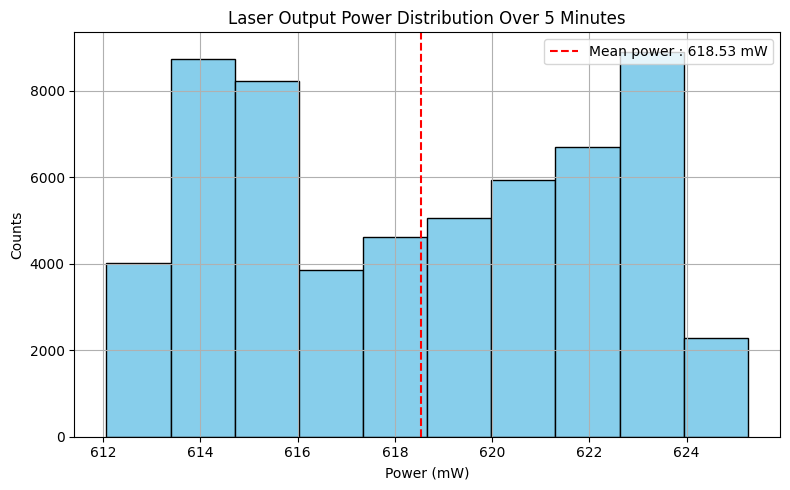

Mean power = 618.53 mW
Standard deviation = 3.6803 mW
Relative standard deviation = 0.595 %


In [6]:
plt.figure(figsize=(8, 5))
plt.bar(power_values, count, width=bin_width,
        align='center', color='skyblue', edgecolor='black')
plt.axvline(mean_power, color = 'r', linestyle = '--', label = 'Mean power : {} mW'.format(mean_power))
plt.title("Laser Output Power Distribution Over 5 Minutes")
plt.xlabel("Power (mW)")
plt.ylabel("Counts")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

print("Mean power =", mean_power, "mW")
print("Standard deviation =", std_dev, "mW")
print("Relative standard deviation =", relative_std, "%")

*<center> Describe the figure and comment on the stability of the laser used in the experiment. </center>*

This first figure show an histogram of the different power values of the laser over a 5 minute measurement via a Power meter.

The values range from 612.1 to 625.3 mW. We find a standard deviation of 3.68 mW, which corresponds to a relative standard deviation of ≈ 0.60 %. This means that typical fluctuations are only about 0.6 % of the mean power, so the laser is quite stable over the 5-minute interval.

## SHG output power - temperature dependance

### In this section, input your data from the experiment to analyse the dependance of the generated second harmonic power as a function of temperature. Fit the data with the appropriate function.

In [7]:
# Create the fitting function

def shg_fit_func(T, A, b, T0, C):
    """
    A  * sinc^2( (T - T0)*b )  +  C
    where np.sinc(x) = sin(pi*x)/(pi*x)
    A  : peak amplitude (P_in*cste)
    b  : width parameter
    T0 : Optimal phase matching temperature
    C  : Offset
    """
    x = b*(T - T0)
    return A * np.sinc(x)**2 + C

*<center>Describe why the fit is a sinc^2*</center>

The theory gives us that the SHG power is related to the phase mismatch ($\Delta k$) and lenght of the non linear material ($L$) via a sinc² function such as:

<center>
$ P_{\mathrm{SHG}} \propto \mathrm{sinc}^2\!\bigl(\Delta k \cdot L)\bigr)$ </center>

Indeed: the non-linear material must generates second harmonics with the same phase or they'll cancel each other. We want the amplitudes to add coherently in order for $P_{SHG}$ to be important.

Assuming linear relation between $\Delta k \cdot L$ and temperature change we get:

<center>
$ P_{\mathrm{SHG}}(T) \propto \mathrm{sinc}^2\!\bigl(b (T - T_0)\bigr)$ </center>

with $b$ an $T_0$ as described in the code cell above.

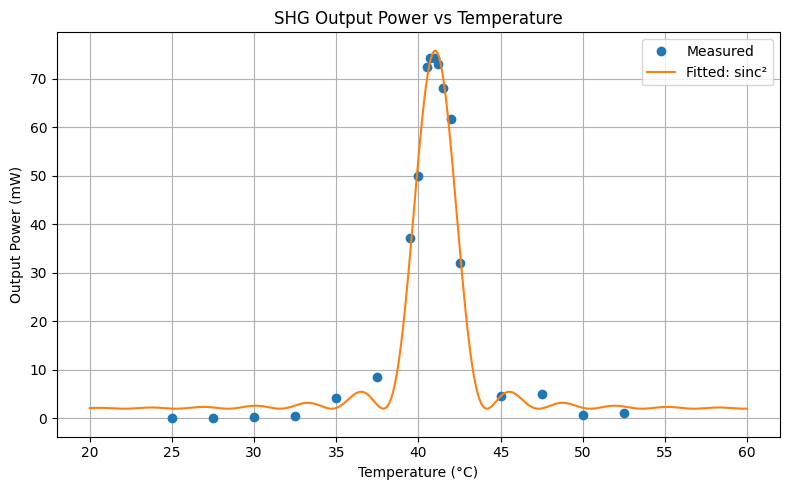

Optimal phase matching temperature = 41.0 °C


In [16]:
# Curve fitting

popt, _ = curve_fit(shg_fit_func, T, Pmean, p0=[85, 0.3, 40.5, 2])
T_fit = np.linspace(20, 60, 400)
P_fit = shg_fit_func(T_fit, *popt)

T_0 = popt[2].round(1)
# Plot

plt.figure(figsize=(8, 5))
plt.plot(T, Pmean, 'o', label="Measured")
plt.plot(T_fit, P_fit, '-', label="Fitted: sinc²")
plt.title("SHG Output Power vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Output Power (mW)")
#plt.errorbar(T, Pmean, yerr=std, fmt="none", capsize=4, elinewidth=1, color = 'r', label = 'error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Optimal phase matching temperature =", T_0,  "°C")

*<center>What is this figure telling me? Comment on the shape of the lobes</center>*

The figure displays the theorical curve in sinc² shape vs. the measured experimental point of the SHG power while spanning temperature. The fitting maximum power is obtained at optimal temperature $T_0 = 41°C$.

The two curves seem to align best around the central lobe at peak T = $T_0$ and same width.
This good match confirms that SHG efficiency is dominated by the phase-matching condition. The side lobes are qualitatively reproduced but show an asymmetry (left lobe higher than the other) that does not appear in the ideal sinc² theory.

Assuming we're using the right model, thee could be other reasons for the shape of the experimental lobes:
- Non-uniform temperature : a gradient of temperature in the waveguide could stretch one side of the curve.
- Coupling efficiency of the optical fiber with the waveguide could drift as temperature change and could alter the input power.
- Non linear material imperfections that could shift with temperature and distort one of the side lobes.

## Plotting expected variance plots

### Use the characterisation data provided to estimate the expected squeezing and anti-squeezing levels

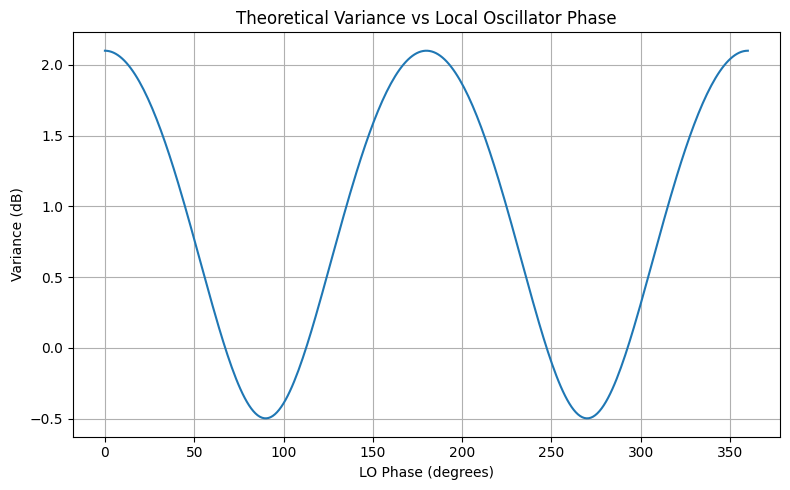

Squeezing = -0.5 dB , Antisqueezing = 2.1 dB


In [9]:
theta = np.linspace(0, 2 * np.pi, 300) # Local oscillator phase
alpha_opa = 0.764 # 1/W
Popt = 1 # SHG power in W
R = np.sqrt(alpha_opa * Popt)
V_minus = np.exp(-2 * R)
V_plus = np.exp(2 * R)
eta = 0.6*0.9*0.77*0.83*0.95*0.8*0.5 # Total efficiency estimate
V_theta = 10 * np.log10(eta * (np.cos(theta)**2 * V_plus + np.sin(theta)**2 * V_minus) + (1 - eta))
plt.figure(figsize=(8, 5))
plt.plot(theta * 180/np.pi, V_theta)
plt.title("Theoretical Variance vs Local Oscillator Phase")
plt.xlabel("LO Phase (degrees)")
plt.ylabel("Variance (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

Squeeze = min(V_theta).round(2)
Antisqueeze = max(V_theta).round(2)

print("Squeezing =", Squeeze, "dB , Antisqueezing =", Antisqueeze, 'dB')


*<center>What is this theoretical estimate telling us? Comment on the asymmetry of the squeezing and anti-squeezing level</center>*

As you rotate the LO phase, the measured noise variance should swing between two extrema every 180°: the dips (≈ 90° and 270°) are the squeezed quadrature, the crests are the anti-squeezed quadrature. It shows clearly here that squeezed state are phase dependant.

We get the total efficency of the system by multiplying the efficiencies of the different devices after the OPA with the efficiency of the OPA itself which give roughly:

<center>$\eta_{tot}≈13\%$</center>

The theory predicts small negative dB for squeezing, bigger positive dB for anti-squeezing : With any $η<1$ (imperfect material and propagation), the minimum is driven up toward shot noise (0 dB) much faster than the maximum is driven down. Hence the asymmetry of the curve.

This theoretical estimate predicts observable squeezing at specific LO phases (multiples of pi/2) but warns us that we’ll only see a few dB below shot unless total efficiency η is very high.

We should then get around -0.5dB of squeezing and 2.1 dB of anti-squeezing in our next experiment.



## Zero span measurements

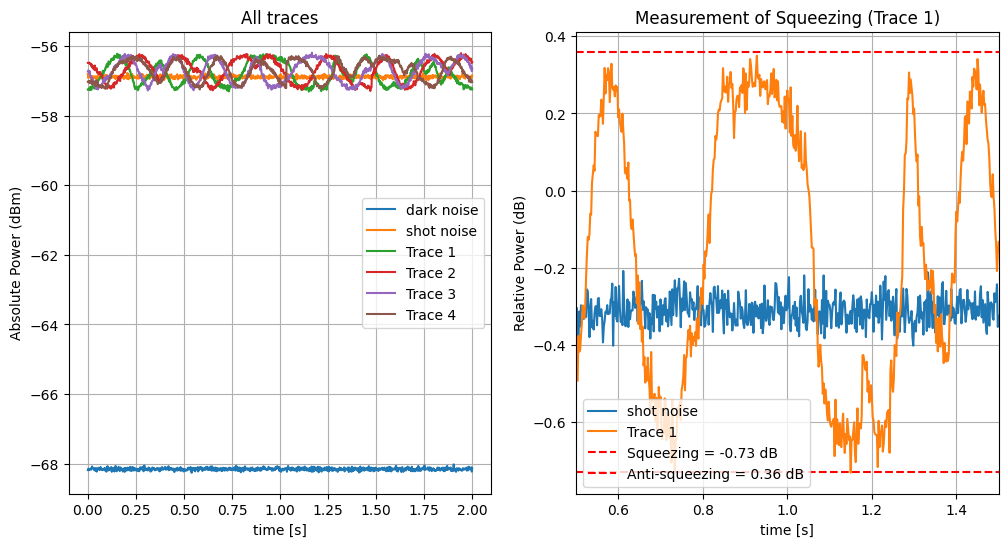

In [21]:
# Plot your Zero span data here

from statistics import mean

fig1=plt.figure(num=1, figsize=(12,6))
fig1.clf()
ax1=fig1.add_subplot(121)
ax2=fig1.add_subplot(122)

def Lbl(i):
  if i ==0:
    return 'dark noise'
  elif i ==1:
    return 'shot noise'
  else:
    return 'Trace {}'.format(i-1)

# First figure, all traces

for i in range (6):
  ax1.plot(t[i], V[i], label = Lbl(i))

ax1.set_title('All traces')
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Absolute Power (dBm)')
ax1.grid(True)
ax1.legend()

# Second figure : 1 trace + shot noise

Ref_level = -56.58 # dBm

P_dB = [Vi - Ref_level for Vi in V]

ax2.plot(t[1], P_dB[1], label = "shot noise")
ax2.plot(t[2], P_dB[2], label = "Trace 1")

squeezing = min(P_dB[2]).round(2)
antisqueezing = max(P_dB[2]).round(2)

ax2.axhline(squeezing, label = "Squeezing = {} dB".format(squeezing), color = 'r',  linestyle = '--')
ax2.axhline(antisqueezing, label = "Anti-squeezing = {} dB".format(antisqueezing), color = 'r', linestyle = '--')


ax2.set_title('Measurement of Squeezing (Trace 1)')
ax2.set_xlim(0.5, 1.5)
ax2.set_xlabel('time [s]')
ax2.set_ylabel('Relative Power (dB)')
ax2.grid(True)
ax2.legend()

*<center>What is a zero span measurement? What were the settings of the spectrum analyser? Is there a correlation between the applied voltage
and the number of arches seen? Why are the squeezing and antisqueezing so asymmetric? Does the experimental data qualitatively agree
with the theoretical estimate?</center>*

In this part of the lab we aimed to see the squeezing and anti-squeezing on the spectrum analyser via a zero-span measurement.

Normally a spectrum analyser gives you the Power vs. frequency plot of your signal. Here we set the frequency span at 0, and look at one single frequency (20MHz) power evolution over time.

In the first figure we observe the flat signals of dark noise at -68 dBm and shot noise at -56.58dBm (considered to be the reference level for our measurements), all the waving different traces of .

The second figure is a focus on trace 1 signal with which was calculated the squeezing.

As we're driving the fiber stretcher with voltage, the latest changes the LO phase. So the voltage is directly proportional to the number of arches observed since a 2$\pi$ span shows up as one arch.

From the measurement we get: −0.73 dB of squeezing and 0.36 dB of Anti-squeezing. So the magnitude of the squeezing is almost twice that of the anti-squeezing, and both are quite small.
The simple losses model predicts assymetry but also $∣anti-squeezing∣ ≥ ∣squeezing∣$, which is not the case here.
This is most likely due to additional losses, imperfect phase scanning and calibration errors not captured in the simple theoretical model.


## Standard deviation and errors

### Power vs Temperature uncertainty

In [18]:
# Power vs Temperature uncertainty

rel_err = (std / Pmean) * 100
imax = np.argmax(Pmean)
P_peak = Pmean[imax]
σ_peak = std[imax]
rel_peak = rel_err[imax]

print(f"Optimal phase-matching temperature: {T_0:.2f} °C")
print(f"Peak SHG power: {P_peak*1e3:.2f} ± {σ_peak*1e3:.2f} mW "
      f"({rel_peak:.2f} % uncertainty)")
print(f"Mean relative uncertainty over all points: {np.mean(rel_err):.2f} %")
print(f"Max relative uncertainty: {np.max(rel_err):.2f} % at T = {T[np.argmax(rel_err)]:.1f} °C")

Optimal phase-matching temperature: 41.00 °C
Peak SHG power: 74250.00 ± 22.68 mW (0.03 % uncertainty)
Mean relative uncertainty over all points: 6.00 %
Max relative uncertainty: 86.96 % at T = 30.0 °C


From the sinc² fit we obtain an optimal phase-matching temperature of 41.0°C, at which the SHG power is 74.25±0.02 W
74.25±0.02 W (0.03 % uncertainty). On average the relative uncertainty of the SHG measurements over the whole temperature scan is about 6 %, but this is dominated by points far from phase matching where the SHG signal is very small; the largest relative uncertainty (~87 %) occurs at 30°C, where the SHG power is close to zero. Near the peak, the SHG power is therefore measured with high precision.

### Zero span measurement uncertainty

In [36]:
win = 50  # number of samples on each side

sq_region   = P_dB[2][i_squeezing-win : i_squeezing+win]
anti_region = P_dB[2][i_antisqueezing-win : i_antisqueezing+win]

std_squeezing    = np.std(sq_region,   ddof=1)
std_antisqueezing = np.std(anti_region, ddof=1)

print(f"Squeezing = {squeezing:.2f} ± {std_squeezing:.2f} dB")
print(f"Anti-squeezing = {antisqueezing:.2f} ± {std_antisqueezing:.2f} dB")



Squeezing = -0.73 ± 0.16 dB
Anti-squeezing = 0.36 ± 0.27 dB


From the zero-span trace we extract a squeezing level of −0.73 ± 0.16 dB and an anti-squeezing level of 0.36 ± 0.27 dB, where the uncertainties represent the temporal standard deviation of the noise in a window around the extrema. The squeezed state is thus consistently about 0.7 dB below shot noise, while the anti-squeezed quadrature is only slightly above shot noise and exhibits larger fluctuations.

## Description of an experiment where squeezed light is used

*<center>In this section highlight an experiment (with referencing the paper) where squeezed light has been used Make sure to describe which part
of the experiment benefitted from the use of squeezed light</center>*

<center>

**Squeezed Vacuum Used to Accelerate the Search for a Weak Classical Signal**

</center>

[Paper link](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.9.021023)


- Aim and context of the experiment:

Axion haloscopes search for an extremely weak, very narrowband microwave signal whose frequency is unknown. These searches are already limited by quantum vacuum noise in the cavity field. The aim of this experiment is to show, in a realistic haloscope-like setup, that using squeezed vacuum in the receiver can beat the usual quantum limit and speed up the scan, i.e. find the same tiny signal in less total time.
Indeed, the scanning time needed for detection is inversely proportional to the SNR, so the lower the floor noise is, the more effective is the search.

- Experiment setup:

They use a tunable microwave cavity as a fake axion detector and surround it with two JPAs (Josephson Parametric Amplifiers). The first JPA sends squeezed vacuum into the cavity, which reduces quantum noise in one quadrature of the field; the second JPA then amplifies and reads out that low-noise quadrature with almost no extra noise. By scanning the cavity frequency and looking for a tiny injected test signal, once with normal vacuum and once with squeezed vacuum, they directly compare how much better the squeezed setup performs for a realistic axion-style search.

- Results:

Experimentally they deliver about 4–5 dB of effective squeezing to the cavity and show that the squeezed-state receiver increases the spectral scan rate by a factor of about 2.1 at fixed detection sensitivity to the fake signal. This means you can cover the same frequency range in roughly half the time. Crucially, this measured enhancement agrees very well with their theoretical model, which includes imperfect squeezing and microwave losses, confirming that squeezed vacuum can give a practical speed-up for axion-style searches.